## BoomBikes Case Study - Model selection

Goal - Model the demand for shared bikes with the available independent variables. This will help estimate how demands vary with features. This in turn will shape market strategy and help understand the demand dynamics of a new market.

### Step 1 - Importing and Understanding Data

In [354]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# Importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [355]:
# Importing Data
bikes = pd.read_csv('day.csv')

In [356]:
# View sample data
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [357]:
bikes.shape

(730, 16)

In [358]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [359]:
bikes.drop(['instant','dteday'], axis=1, inplace=True)

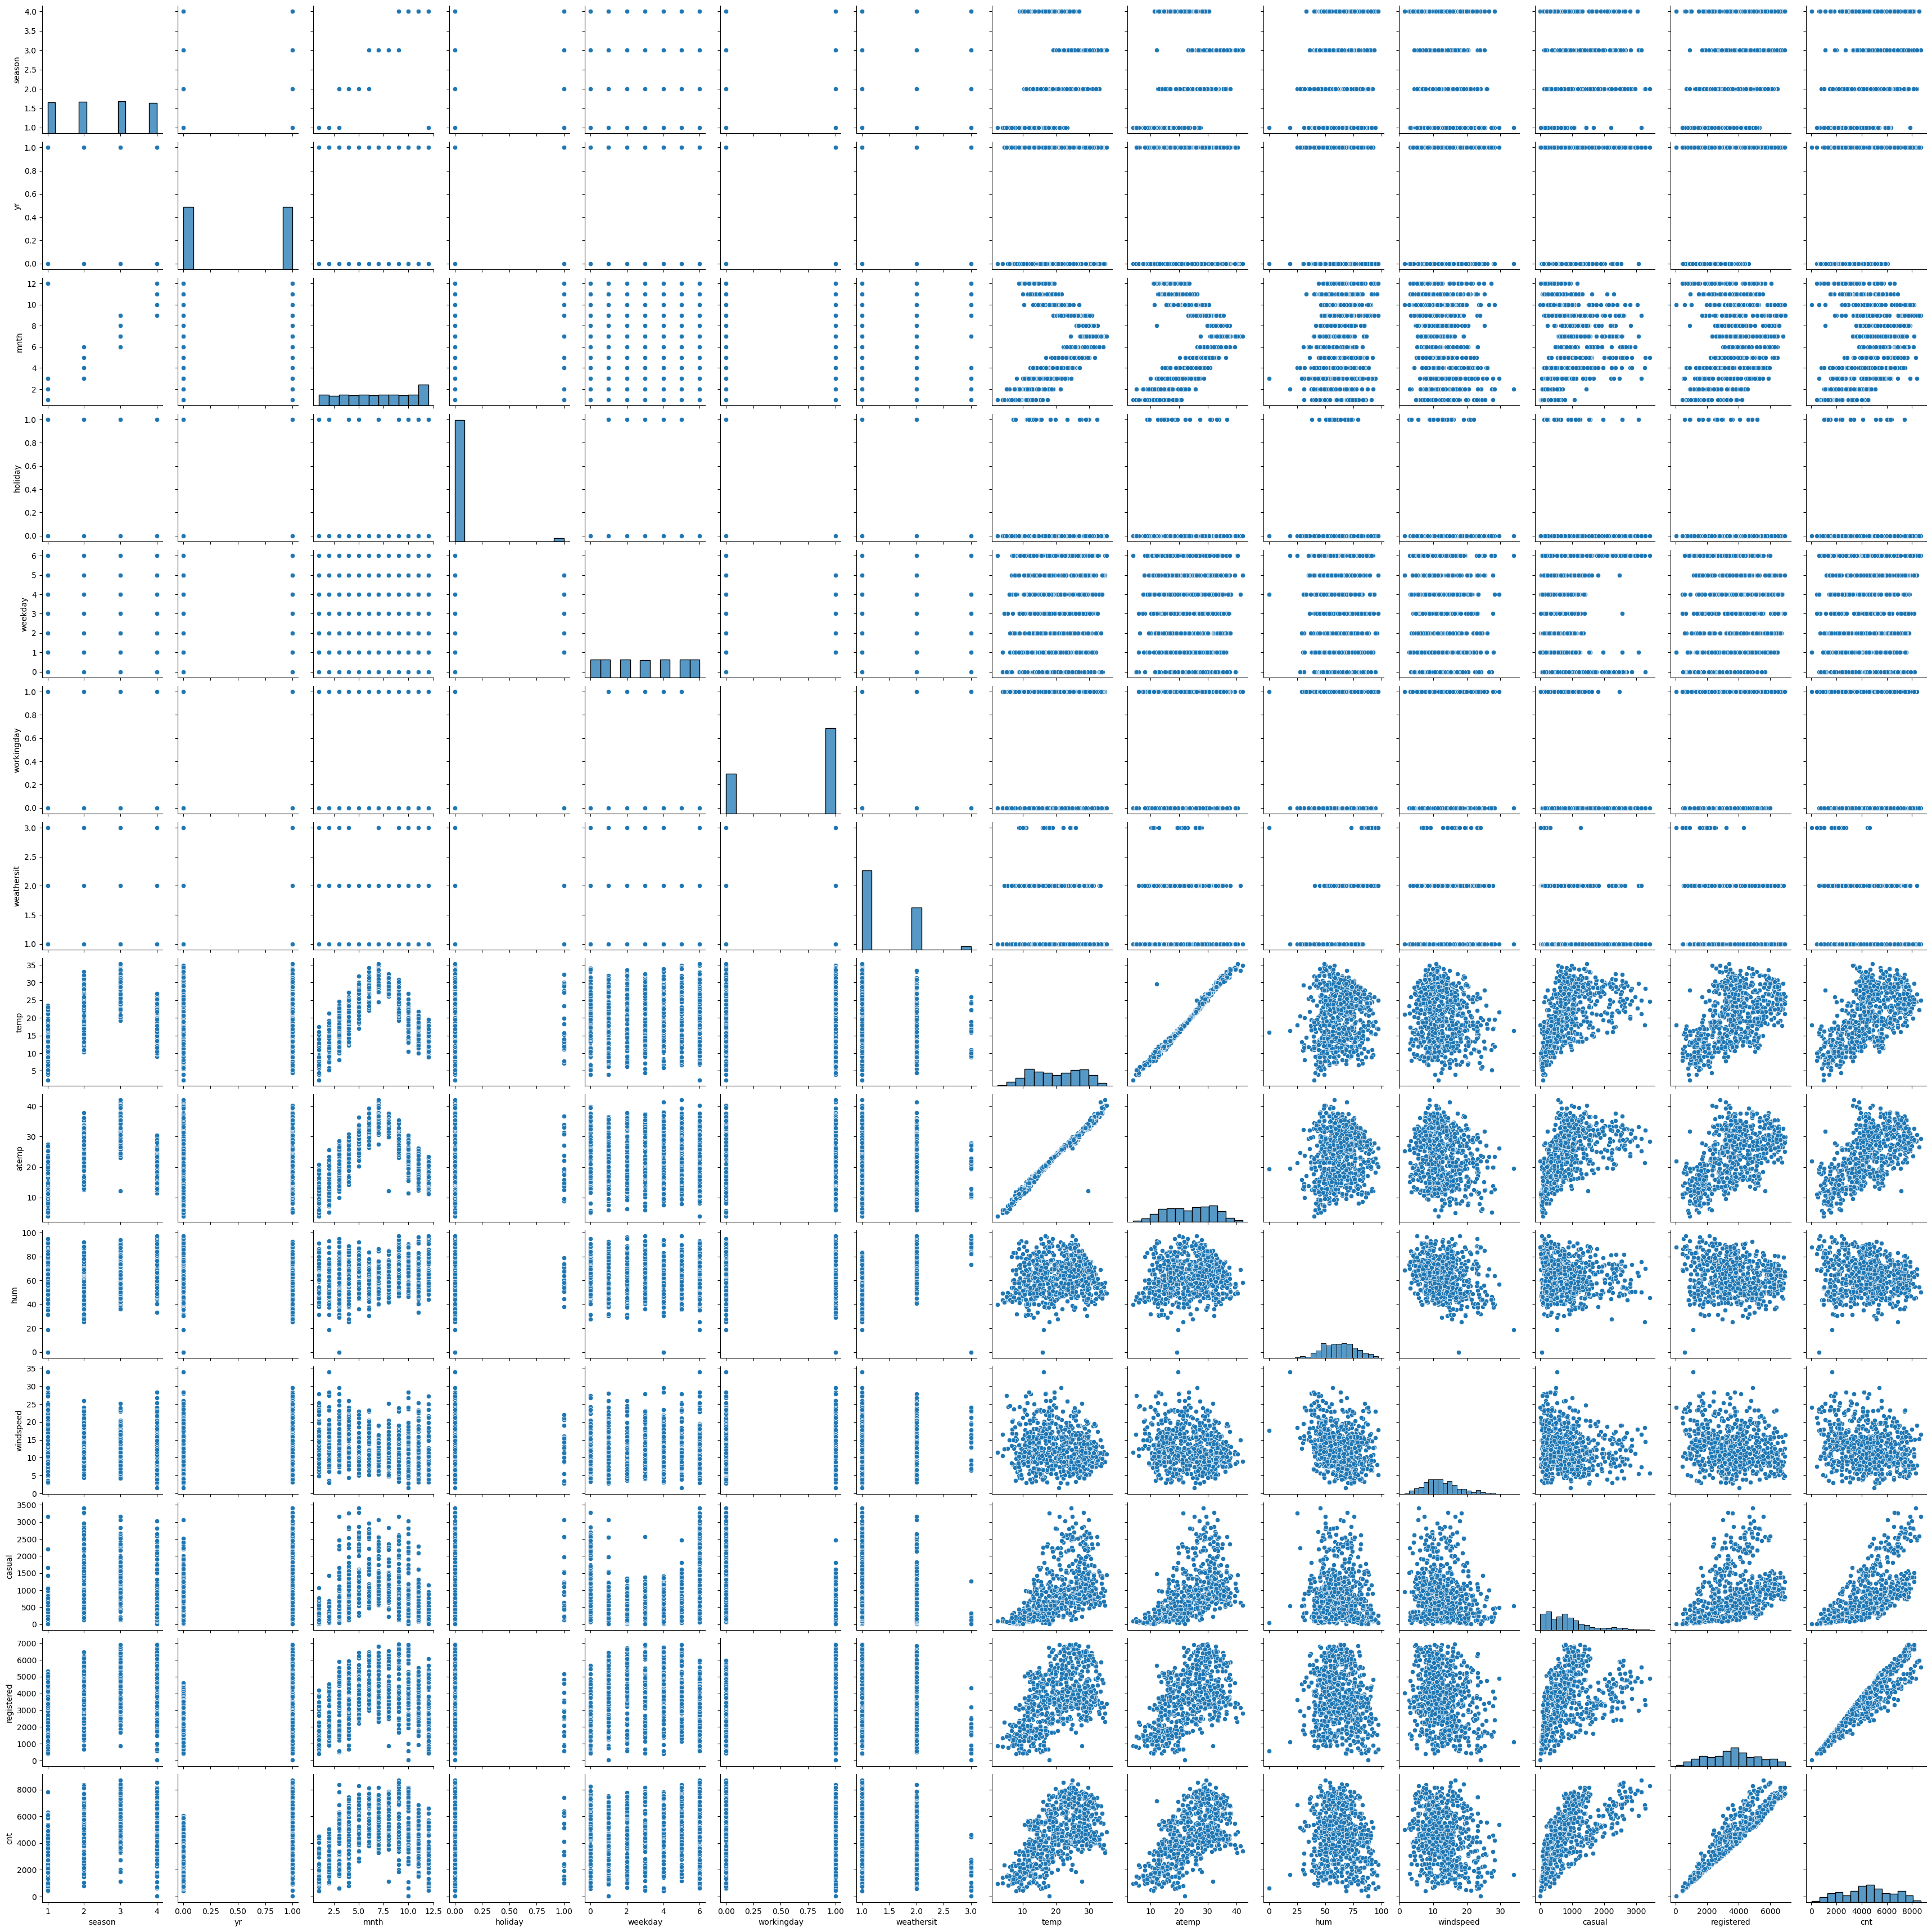

In [360]:
sns.pairplot(bikes)
plt.show()

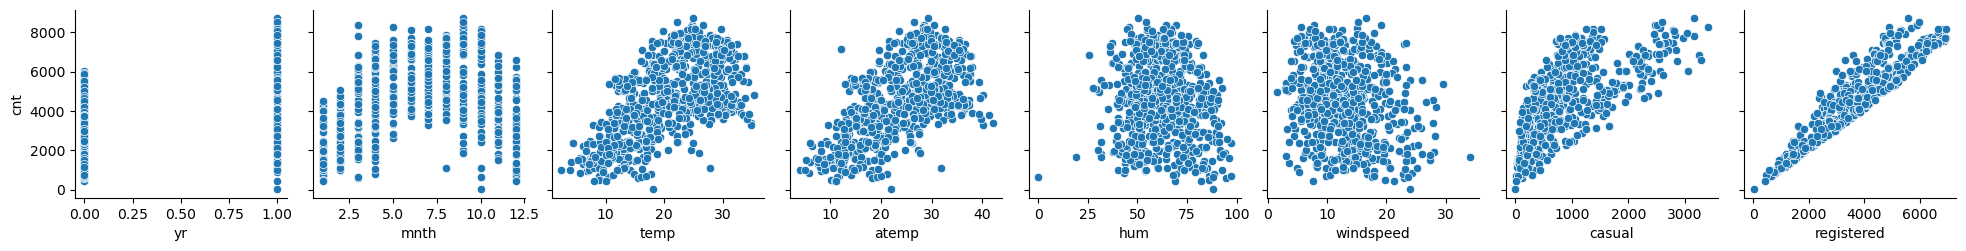

In [361]:
sns.pairplot(data=bikes, y_vars=['cnt'], x_vars=['yr','mnth','temp','atemp','hum','windspeed','casual','registered'])
plt.show()

### Step 2 - Data Preparation

In [362]:
# Map season and weather columns. Drop instant column
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bikes['seasondesc'] = bikes['season'].map(season_map)

weathersit_map = {1:'Clear', 2:'Mist', 3:'Light', 4:'Heavy'} 
bikes['weatherdesc'] = bikes['weathersit'].map(weathersit_map)

In [363]:
# Drop season, weather and few other variables
bikes.drop(['season','weathersit','casual','registered'], axis=1, inplace=True)

In [364]:

bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,seasondesc,weatherdesc
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,spring,Mist
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,spring,Mist
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Clear
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Clear
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Clear


### Step 3 - Dummy Variables

The variable `seasondesc` has four levels. Similarly, the variable `weather` has four levels. We need to convert these levels into integer. 

In [365]:
season = pd.get_dummies(bikes['seasondesc'])


season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We don't need 4 columns. We will drop the `fall` column, as it can be identified with just the last 3 columns where — 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [366]:
# Drop the first column from season df using 'drop_first = True'
season = pd.get_dummies(bikes['seasondesc'], drop_first = True)

# Add the results to the original dataframe
bikes = pd.concat([bikes, season], axis = 1)

bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,seasondesc,weatherdesc,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,spring,Mist,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,spring,Mist,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Clear,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Clear,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Clear,1,0,0


In [367]:
# Drop 'seasondesc' as we have created the dummies for it
bikes.drop(['seasondesc'], axis = 1, inplace = True)

bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weatherdesc,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,Mist,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Mist,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Clear,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,Clear,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,Clear,1,0,0


In [368]:

weather = pd.get_dummies(bikes['weatherdesc'])

weather.head()

,Clear,Light,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


There is no data for 'Heavy' weather. So we don't need 3 columns. We will drop the `Clear` column, as it can be identified with just the last 3 columns where — 
- `00` will correspond to `Clear`
- `10` will correspond to `Light`
- `01` will correspond to `Mist`

In [369]:
# Let's drop the first column from status df using 'drop_first = True'
weather = pd.get_dummies(bikes['weatherdesc'], drop_first = True)

# Add the results to the original dataframe
bikes = pd.concat([bikes, weather], axis = 1)

bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weatherdesc,spring,summer,winter,Light,Mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,Mist,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Mist,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Clear,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,Clear,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,Clear,1,0,0,0,0


In [370]:
# Drop 'furnishingstatus' as we have created the dummies for it
bikes.drop(['weatherdesc'], axis = 1, inplace = True)

bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light,Mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Step 4 - Splitting the Data into Training and Testing Sets

In [371]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features using MinMax scaling


In [372]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [373]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
nvars = ['mnth', 'weekday', 'temp', 'atemp', 'hum','windspeed','cnt']

df_train[nvars] = scaler.fit_transform(df_train[nvars])

df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light,Mist
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1


### Dividing into X and Y sets for the model building

In [374]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5 - Building our model using LinearRegression function from SciKit Learn for its compatibility with RFE 

### RFE (Recursive feature elimination)

In [375]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [376]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)           
rfe = rfe.fit(X_train, y_train)

In [377]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('Light', True, 1),
 ('Mist', True, 1)]

In [378]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Light', 'Mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [379]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [380]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [381]:
# Running the model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [382]:
# Priniting the summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.24e-181
Time:                        23:02:14   Log-Likelihood:                 481.84
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     499   BIC:                            -895.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3366      0.033     10.347      0.0

R-squared is good. Prob (F-statistic) is small. `atemp` is insignificant and hence can be dropped

In [383]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### Rebuilding the model without `atemp`

In [384]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [385]:
# Running the model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [386]:
# Print summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.64e-182
Time:                        23:02:27   Log-Likelihood:                 481.53
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     500   BIC:                            -900.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3382      0.032     10.421      0.0

In [387]:
# Drop constant for VIF step
X_train_new = X_train_new.drop(['const'], axis=1)

In [388]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.58
2,temp,12.97
4,windspeed,3.94
5,spring,2.51
8,Mist,2.23
6,winter,2.09
0,yr,2.05
7,Light,1.20
1,holiday,1.04


#### 'hum' and 'temp' have high VIF. We will drop 'hum' and rebuild the model

In [389]:
X_train_new.drop(['hum'], axis = 1, inplace = True)

In [390]:
X_train_lm = sm.add_constant(X_train_new)

In [391]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'Light', 'Mist'],
      dtype='object')

In [392]:
# Running the model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [393]:
# Print summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     285.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.62e-181
Time:                        23:02:56   Log-Likelihood:                 476.25
No. Observations:                 510   AIC:                            -934.5
Df Residuals:                     501   BIC:                            -896.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2684      0.024     10.973      0.0

In [394]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'Light',
       'Mist'],
      dtype='object')

In [395]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.91
2,temp,3.53
0,yr,2.05
4,spring,1.64
7,Mist,1.49
5,winter,1.37
6,Light,1.08
1,holiday,1.04


## Step 6 - Residual Analysis


In [396]:
y_train_cnt = lm.predict(X_train_lm)

In [397]:
# Importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

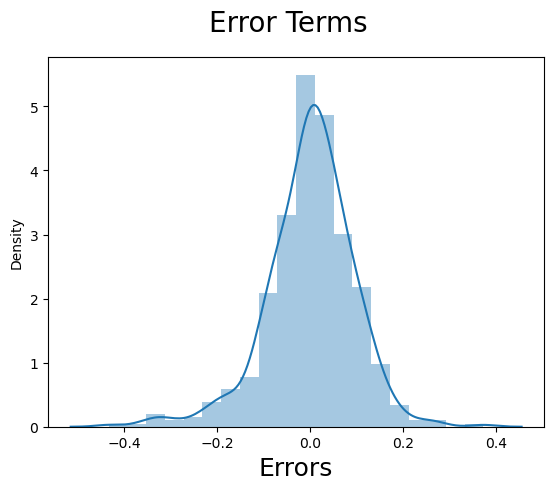

In [398]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

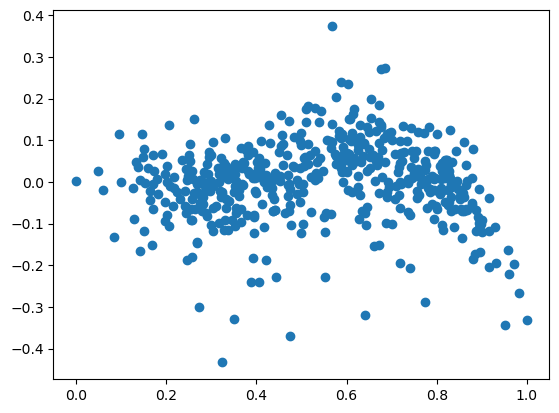

In [399]:
# We cannot scatter plot residual vs X_train as shapes are different. Hence, we will pick 
# the variable that has the strongest effect on the target variable and plot residual against it
plt.scatter(X_train_lm['temp'],y_train - y_train_cnt)
plt.show()

## Step 7 - Making Predictions

In [400]:
# Applying scaling
nvars = ['mnth', 'weekday', 'temp', 'atemp', 'hum','windspeed','cnt']

df_test[nvars] = scaler.transform(df_test[nvars])

df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light,Mist
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0


In [401]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [402]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [403]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 8 - Model Evaluation

Text(0, 0.5, 'y_pred')

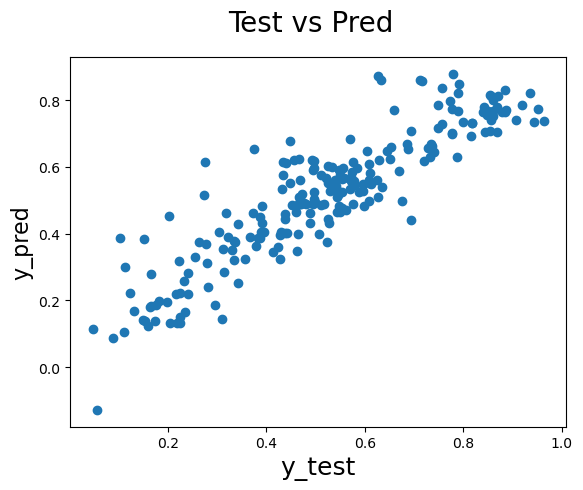

In [404]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Test vs Pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

In [405]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8014591758694877